In [47]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [48]:
%matplotlib inline

In [49]:
dataset_path = 'CroppedYale/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [106]:
training_pics_address = np.load('./training_pics.npy', allow_pickle=True)
testing_pics_address = np.load('./testing_pics.npy', allow_pickle=True)

def load_images():
    im_size=(64,64)
    training_im = []
    testing_im = []
    training_label = []
    testing_label = []
    
    for i in training_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        training_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        training_label.append(gg)
        
    for i in testing_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        testing_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        testing_label.append(gg)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

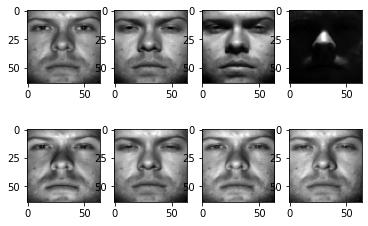

In [132]:
training_tensor = np.ndarray(shape=(len(training_pics_address), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

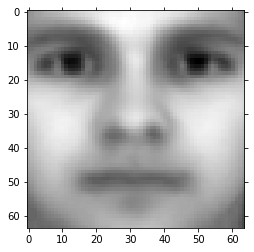

In [133]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_pics_address))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [137]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_pics_address), height*width))

for i in range(len(training_pics_address)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

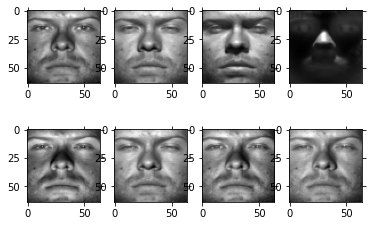

In [138]:
plt.clf()
for i in range(len(training_pics_address)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [160]:
len(training_pics_address)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [161]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_pics_address))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(2249, 2249)
Covariance matrix of X: 
[[ 0.34090058  0.37157354  0.32613291 ... -0.22815374 -0.25219367
  -0.13725903]
 [ 0.37157354  0.6117997   0.73457234 ... -0.3499831  -0.34034566
  -0.19595905]
 [ 0.32613291  0.73457234  1.16073141 ... -0.41831168 -0.35996302
  -0.2155794 ]
 ...
 [-0.22815374 -0.3499831  -0.41831168 ...  1.50374511  1.51774488
   0.84196384]
 [-0.25219367 -0.34034566 -0.35996302 ...  1.51774488  1.93472895
   1.25233389]
 [-0.13725903 -0.19595905 -0.2155794  ...  0.84196384  1.25233389
   1.19113858]]


In [162]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-2.43500076e-05 -2.39422984e-02 -8.76120573e-03 ... -5.16027258e-03
   3.49189412e-03  1.27022821e-02]
 [-4.24771344e-04 -3.52335388e-02  1.55990516e-02 ... -1.34342285e-02
   4.60591704e-02 -7.59316962e-02]
 [-1.57583741e-03 -4.27799833e-02  4.67342991e-02 ...  6.21641918e-03
  -2.01083249e-02  1.02981341e-02]
 ...
 [-2.36449597e-02  3.64343598e-02 -3.63682760e-03 ...  9.18330613e-03
  -3.00826283e-03  5.27239150e-03]
 [-2.42799010e-02  4.07446608e-02  1.31325409e-02 ...  2.43631983e-03
   1.94422304e-03 -1.69335750e-03]
 [-1.52493976e-02  2.60062162e-02  1.34279300e-02 ...  6.44487316e-03
   4.26826722e-03 -3.85897968e-03]]

Eigenvalues of Cov(X): 
[1.27281178e+03 2.94093754e+02 1.47280528e+02 ... 1.91792825e-04
 1.91637247e-04 1.99953526e-04]


In [163]:
eigenvectors.shape

(2249, 2249)

In [164]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.51264691 0.63109824 0.69041801 ... 1.         1.         1.        ]


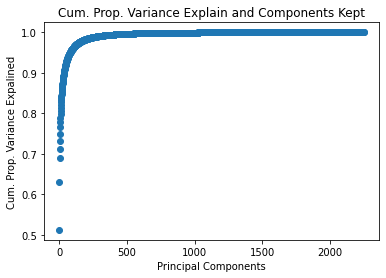

In [165]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [166]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [167]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

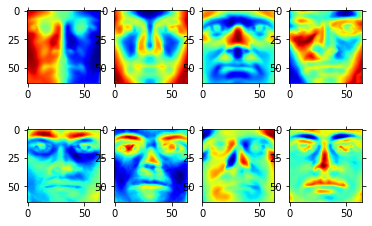

In [168]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [169]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

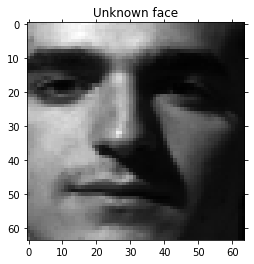

In [170]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

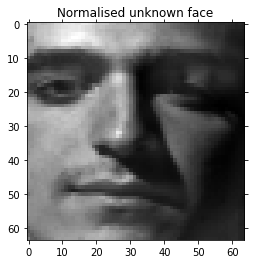

In [171]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [172]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 3.09059756e+08, -4.46999571e+08, -1.09557416e+08,  4.82942033e+06,
       -2.41386888e+06, -2.30992039e+08,  5.87587268e+07, -1.14140137e+08])

In [173]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[3.75003699e+08 3.62800559e+08 4.01948030e+08 ... 9.77434900e+08
 9.98774022e+08 9.71525685e+08]


86300187.68567804

In [178]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count, num_images, correct_pred
    unknown_face = img
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1:

        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in testing_im:
    recogniser(i, training_label, proj_data, w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

AttributeError: 'numpy.ndarray' object has no attribute 'split'

<Figure size 1080x1080 with 0 Axes>

In [35]:
!ls

CroppedYale	    Documents	      FEIDataset   README.md	testing_pics
CroppedYaleTesting  EigenFaces.ipynb  FINAL.ipynb  YaleDataset	training_pics


In [ ]:
import random
  
# declaring list
list = [2, 2, 4, 6, 6, 8]
  
# initializing the value of n
n = 4
  
# printing n elements from list
print(random.sample(list, n))

In [81]:
dirs = os.listdir('CroppedYale/')

testing_pics = []
training_pics = []

for i in dirs:
    print(i)
    
    pics = os.listdir('CroppedYale/'+i)
    testing_mojo = random.sample(range(len(pics)), int(0.1*len(pics)))
    
    for j in testing_mojo:
        testing_pics.append('CroppedYale/'+i+'/'+pics[j])
    
    training_pics = training_pics + [f'CroppedYale/{i}/{pics[ii]}' for ii in range(len(pics)) if ii not in testing_mojo]
        
training_pics = [i for i in training_pics if '.pgm' in i]   
testing_pics = [i for i in testing_pics if '.pgm' in i]   

testing_pics = np.array(testing_pics)
training_pics = np.array(training_pics)

testing_pics.dump('testing_pics.npy')
training_pics.dump('training_pics.npy')

yaleB01
yaleB02
yaleB03
yaleB04
yaleB05
yaleB06
yaleB07
yaleB08
yaleB09
yaleB10
yaleB11
yaleB12
yaleB13
yaleB15
yaleB16
yaleB17
yaleB18
yaleB19
yaleB20
yaleB21
yaleB22
yaleB23
yaleB24
yaleB25
yaleB26
yaleB27
yaleB28
yaleB29
yaleB30
yaleB31
yaleB32
yaleB33
yaleB34
yaleB35
yaleB36
yaleB37
yaleB38
yaleB39


In [82]:
!ls

CroppedYale	    EigenFaces.ipynb  README.md     testing_pics.npy
CroppedYaleTesting  FEIDataset	      YaleDataset   training_pics
Documents	    FINAL.ipynb       testing_pics  training_pics.npy


In [83]:
print(training_pics)

['CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm'
 'CroppedYale/yaleB01/yaleB01_P00A+000E+20.pgm'
 'CroppedYale/yaleB01/yaleB01_P00A+000E+45.pgm' ...
 'CroppedYale/yaleB39/yaleB39_P00A-110E-20.pgm'
 'CroppedYale/yaleB39/yaleB39_P00A-120E+00.pgm'
 'CroppedYale/yaleB39/yaleB39_P00A-130E+20.pgm']
